In [21]:
from PIL import Image
from numpy import *
from pylab import *
import sift
import imtools
import pydot
import os

In [22]:
imlist = imtools.get_imlist('picture')
featlist = []
for imname in imlist:
  sname = imname+'.sift'
  sift.process_image(imname,sname)
  featlist.append(sname)

processed tmp.pgm to picture/13230069044_abcb7fff3e_z.jpg.sift
processed tmp.pgm to picture/32661283455_cd8d16ee31_z.jpg.sift
processed tmp.pgm to picture/32574213262_5c4063b5d4_z.jpg.sift
processed tmp.pgm to picture/15356006169_fafdfeb6cf_z.jpg.sift
processed tmp.pgm to picture/14774377588_360fe484c6_z.jpg.sift
processed tmp.pgm to picture/34747911481_43f0447931_z.jpg.sift
processed tmp.pgm to picture/14384192793_3315f12015_z.jpg.sift
processed tmp.pgm to picture/34321589411_0b7d115f1f_z.jpg.sift
processed tmp.pgm to picture/15469940433_62cec2333c_z.jpg.sift
processed tmp.pgm to picture/32843314266_c48d53e0d8_z.jpg.sift
processed tmp.pgm to picture/6910879739_9830d680b9_z.jpg.sift
processed tmp.pgm to picture/33085322676_44bd5f9c24_z.jpg.sift
processed tmp.pgm to picture/3798995173_d933d6d72a_z.jpg.sift
processed tmp.pgm to picture/16170941243_9eec10e765_z.jpg.sift
processed tmp.pgm to picture/33907101904_3ec59dff70_z.jpg.sift
processed tmp.pgm to picture/34747241411_75c4f581e2_z.jpg

In [23]:
nbr_images = len(imlist)
matchscores = zeros((nbr_images, nbr_images))
for i in range(nbr_images):
    for j in range(i,nbr_images):
        print 'comparing ', imlist[i], imlist[j]
        
        l1,d1 = sift.read_features_from_file(featlist[i])
        l2,d2 = sift.read_features_from_file(featlist[j])
        
        matches = sift.match_twosided(d1, d2)
        
        nbr_matches = sum(matches > 0)
        print 'number of matches = ', nbr_matches
        matchscores[i, j] = int(nbr_matches)

for i in range(nbr_images):
    for j in range(i+j, nbr_images):
        matchscores[j,i] = matchscores[i,j]
    

comparing  picture/13230069044_abcb7fff3e_z.jpg picture/13230069044_abcb7fff3e_z.jpg
number of matches =  663
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/32661283455_cd8d16ee31_z.jpg
number of matches =  0
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/32574213262_5c4063b5d4_z.jpg
number of matches =  0
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/15356006169_fafdfeb6cf_z.jpg
number of matches =  0
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/14774377588_360fe484c6_z.jpg
number of matches =  1
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/34747911481_43f0447931_z.jpg
number of matches =  6
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/14384192793_3315f12015_z.jpg
number of matches =  0
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/34321589411_0b7d115f1f_z.jpg
number of matches =  7
comparing  picture/13230069044_abcb7fff3e_z.jpg picture/15469940433_62cec2333c_z.jpg
number of matches =  0
comparing  picture/1323006

number of matches =  3
comparing  picture/34747911481_43f0447931_z.jpg picture/34321589411_0b7d115f1f_z.jpg
number of matches =  1
comparing  picture/34747911481_43f0447931_z.jpg picture/15469940433_62cec2333c_z.jpg
number of matches =  0
comparing  picture/34747911481_43f0447931_z.jpg picture/32843314266_c48d53e0d8_z.jpg
number of matches =  0
comparing  picture/34747911481_43f0447931_z.jpg picture/6910879739_9830d680b9_z.jpg
number of matches =  5
comparing  picture/34747911481_43f0447931_z.jpg picture/33085322676_44bd5f9c24_z.jpg
number of matches =  0
comparing  picture/34747911481_43f0447931_z.jpg picture/3798995173_d933d6d72a_z.jpg
number of matches =  0
comparing  picture/34747911481_43f0447931_z.jpg picture/16170941243_9eec10e765_z.jpg
number of matches =  4
comparing  picture/34747911481_43f0447931_z.jpg picture/33907101904_3ec59dff70_z.jpg
number of matches =  3
comparing  picture/34747911481_43f0447931_z.jpg picture/34747241411_75c4f581e2_z.jpg
number of matches =  7
compari

number of matches =  421


In [26]:
threshold = 2

path = os.path.abspath('.') + '/'
g = pydot.Dot(graph_type='graph')
for i in range(nbr_images):
    for j in range(nbr_images):
        if matchscores[i,j] > threshold:
            im = Image.open(imlist[i])
            im.thumbnail((100, 100))
            filename = str(i)+'.png'
            im.save(filename)
            g.add_node(pydot.Node(str(i), fontcolor='transparent', shape='rectangle', image=path+filename))
            
            im = Image.open(imlist[j])
            im.thumbnail((100, 100))
            filename = str(j)+'.png'
            im.save(filename)
            g.add_node(pydot.Node(str(j), fontcolor='transparent', shape='rectangle', image=path+filename))
            
            g.add_edge(pydot.Edge(str(i), str(j)))
g.write_png('goldengate.png')

True

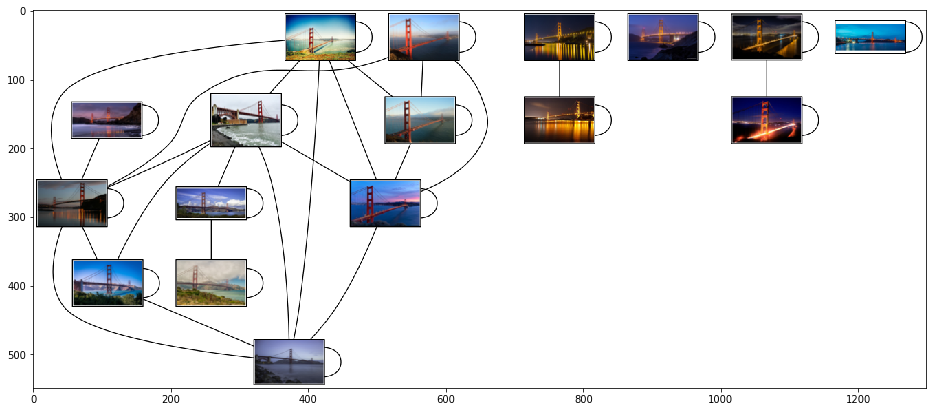

In [27]:
figure(figsize=(16,16))
imshow(Image.open('goldengate.png'))
show()